**Netflix dataset containing information on movies and TV shows. The goal is to uncover insights and patterns within the data, examining factors such as release year, country, ratings, and genres. Through visualizations and statistical analysis, we aim to gain a comprehensive understanding of the content distribution and trends on the Netflix platform.**

**IMPORTING NECESSARY LIBRARIES**

**Now we are reading the data in the form of CSV**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv') #Reading the data
netflix_data.head(5) #Showing the top5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Exploring the dataset and there shapes, size and data type.**

In [3]:
netflix_data.info() #Exploring the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**We are loading the data to see there basic statistics.**

In [4]:
netflix_data.describe() #Now we are reading the basic statistics of the dataset.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Converting the data_added column to date time datatype.**

In [5]:
# Converting the  data types.
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

**Converting the duration column to flot datatype.**


In [6]:
# Converting the  data types
netflix_data['duration'] = pd.to_numeric(netflix_data['duration'].str.extract('(\d+)', expand=False), errors='coerce')

**Checking for the missing values in the dataset**

In [7]:
netflix_data.isnull().sum() # checking for the missing values.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Filling the missing values in the 'country' column with most common country.**

In [8]:
#Filling missing values with most common country.
most_common_country = netflix_data['country'].mode()[0]  
netflix_data['country'].fillna(most_common_country, inplace=True)

**Filling missing values in 'cast' and 'director' columns with 'Not Available'.**

In [9]:
#Filling the missing values with not available.
netflix_data['cast'].fillna('Not Available', inplace=True)
netflix_data['director'].fillna('Not Available', inplace=True)

**Checking for the missing values in the rating column.**

In [10]:
#Checking for the missing values
missing_values = netflix_data['rating'].isnull()
(netflix_data[missing_values])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Not Available,"Oprah Winfrey, Ava DuVernay",United States,2017-01-26,2017,NaN,37.0,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Not Available,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1.0,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Not Available,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1.0,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115.0,Dramas,"Amid the chaos and horror of World War II, a c..."


**Filling the missing values manually by checking from the website.**

In [11]:
# Fill missing values in the 'title' column
netflix_data.loc[netflix_data['title'] == '13TH: A Conversation with Oprah Winfrey & Ava DuVernay', 'rating'] = 'U/A 13+'
netflix_data.loc[netflix_data['title'] == 'Gargantia on the Verdurous Planet', 'rating'] = 'TV-14'
netflix_data.loc[netflix_data['title'] == 'Little Lunch', 'rating'] = 'TV-G'
netflix_data.loc[netflix_data['title'] == 'My Honor Was Loyalty', 'rating'] = 'PG-13'

**Creating new columns.**

In [12]:
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']


In [13]:

# Exploring the distribution of release years
release_year_distribution = netflix_data['release_year'].value_counts().sort_index()

# Exploring the most common genres
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts()



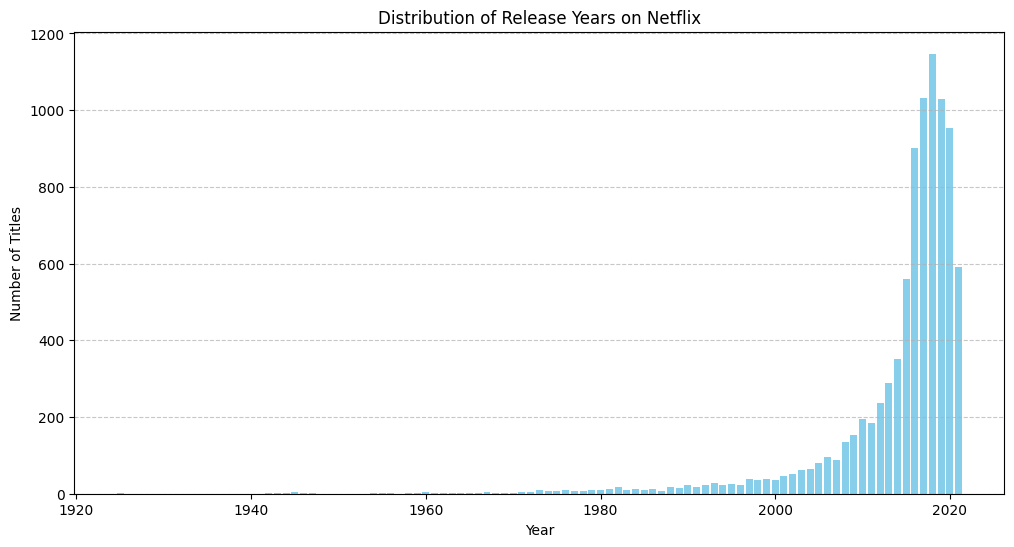

In [14]:
import matplotlib.pyplot as plt

# Plotting the release year distribution
plt.figure(figsize=(12, 6), facecolor='white')
plt.bar(release_year_distribution.index, release_year_distribution.values, color='skyblue')
plt.title('Distribution of Release Years on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


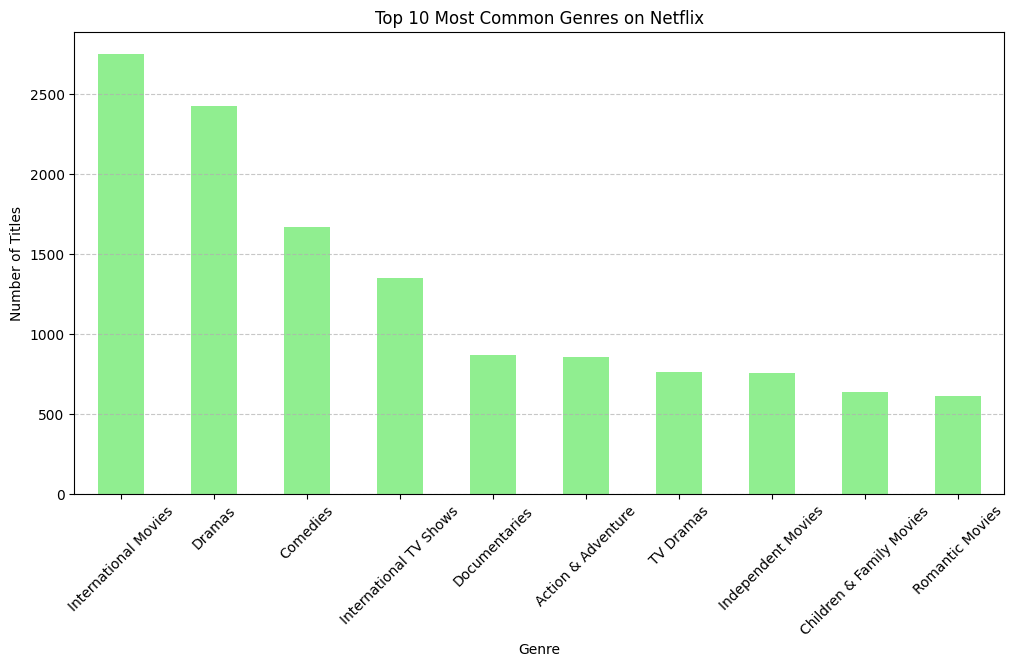

In [15]:
# Plotting the most common genres
plt.figure(figsize=(12, 6), facecolor='white')
genre_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Question 1: which rating has the highest number of counts on netflix?**

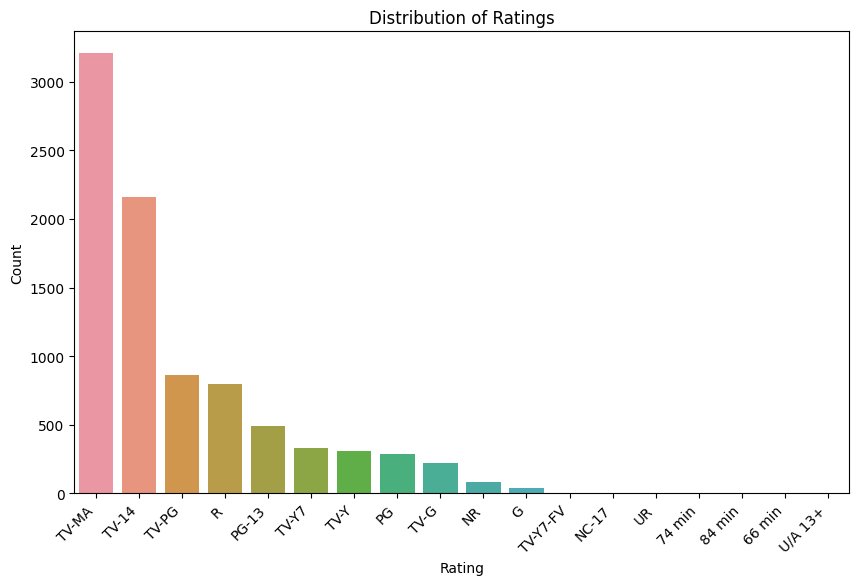

In [16]:
# Creatinbg a Bar chart for rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x ='rating', data = netflix_data, order = netflix_data['rating'].value_counts().index) #Creating a plot for rating column
plt.title('Distribution of Ratings')  #labelling the title.
plt.xlabel('Rating') #labelling the xlabel.
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count') #labelling the ylabel.
plt.show()


**The bargraph shows distribution of rating, where TV-MA has highest count.**

**Question 2: What is percentage of movies and tv shows in netflix?**

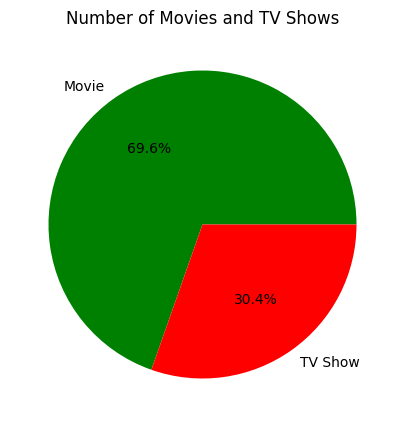

In [17]:
# Creating a Bar chart for the number of movies and TV shows
movies_shows = netflix_data.groupby('type').type.count()
plt.figure(figsize=(8, 5))
plt.pie(movies_shows,labels=movies_shows.index,  autopct='%1.1f%%', colors = ['green', 'red']) #Creating a pie chart.
plt.title('Number of Movies and TV Shows') #labeling the title.
plt.show()



**The pie chart shows percentage of movie and tv shows, where movie has highest number of percentage compare to tv shows.**

**Question 3: Which country has the highest number of content on netflix?**

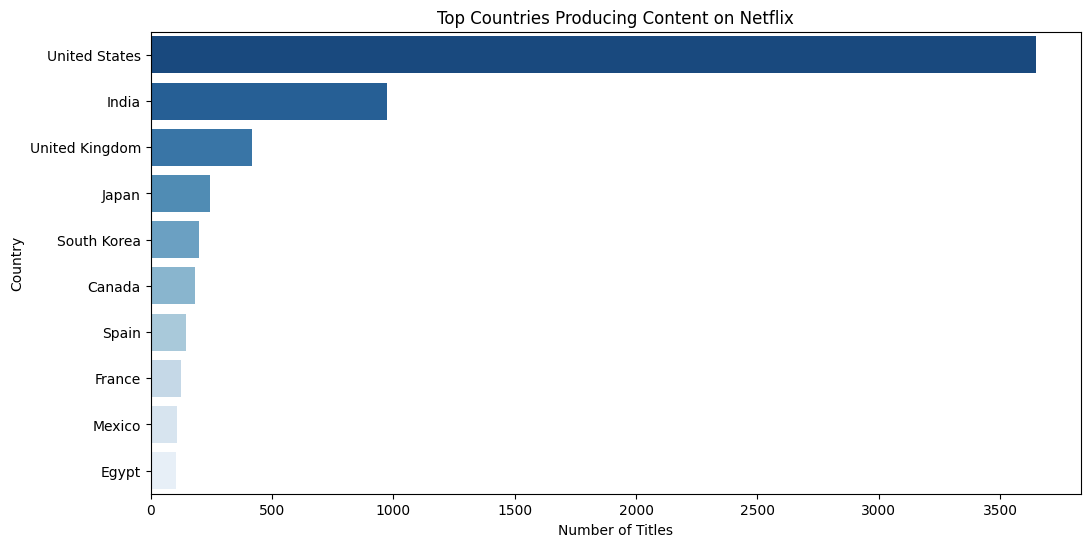

In [18]:
# Count the top countries
top_countries = netflix_data['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r') #Creating a plot for top countries.
plt.title('Top Countries Producing Content on Netflix') #labeling the title
plt.xlabel('Number of Titles') #labeling the xlabel
plt.ylabel('Country') #labeling the ylabel
plt.show()


**The barplot shows top 10 contries with number of titles, where united states has highest number of titles.**

**Question 4: What is the trend in the number of releases for movies and TV shows on Netflix over the years?**

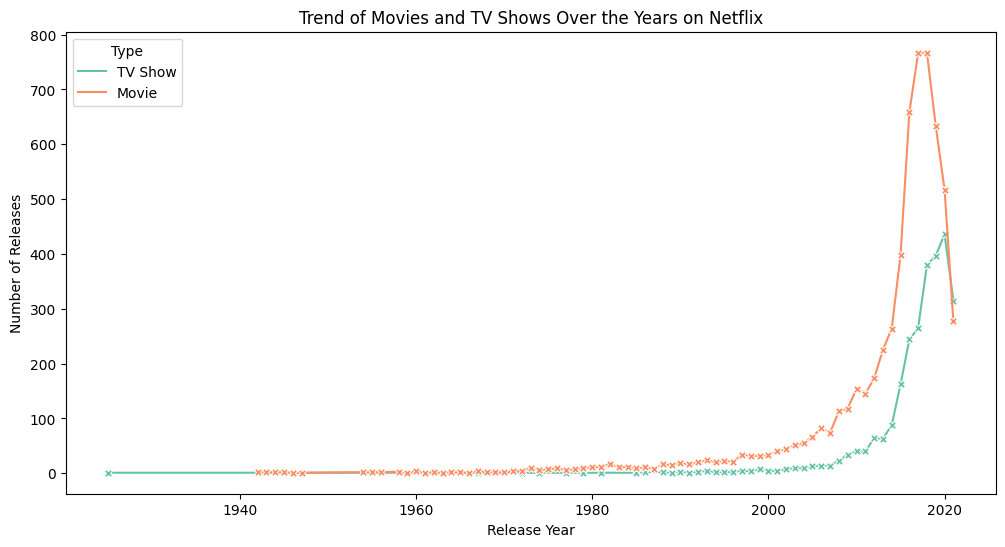

In [19]:
#Creating a release count of movies and tv shows.
release_count = netflix_data.groupby(['release_year', 'type']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', hue='type', marker='X', data=release_count, palette='Set2') #Creating a plot.
plt.title('Trend of Movies and TV Shows Over the Years on Netflix') #labeling the title.
plt.xlabel('Release Year') #labeling the xlabel.
plt.ylabel('Number of Releases') #labeling the ylabel.
plt.legend(title='Type') #labeling the legend.
plt.show()


**The line plot shows the trend of movie and TV show releases on Netflix over the years. It shows the fluctuation in the number of releases for each type.**

**5. Creating content based filtering recommendation based on description and title.**

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'].fillna(''))  # Fill NaN values in 'description' column with empty string

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim, netflix_data=netflix_data):
    idx = netflix_data[netflix_data.title == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Exclude the input title itself
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

# Example usage
input_title = 'Lucifer'
recommendations = get_recommendations(input_title)
print(f"Recommendations for '{input_title}':")
print(recommendations)


Recommendations for 'Lucifer':
1252                 How to Be Really Bad
929               Dead Again in Tombstone
5493    Handsome: A Netflix Mystery Movie
1612                                 Chef
1824                          Taxi Ballad
7867                 Rica, Famosa, Latina
6123                  Along Came a Spider
8683                        Vodka Diaries
6264                   Beauty & the Beast
6915                              Hangman
Name: title, dtype: object


**Developed and implemented a content-based filtering recommendation system for the Netflix dataset, leveraging machine learning techniques to deliver personalized movie and TV show recommendations. Utilized TF-IDF vectorization and cosine similarity to analyze textual descriptions, measuring the similarity between titles.**

**SUMMARY**

**It covers data exploration, basic statistics, data type conversion, handling missing values, and creating visualizations. The analysis includes trends in release years, distribution of ratings, percentages of movies and TV shows, top countries producing content, and the overall trend in the number of releases over the years. The visualizations provide insights into Netflix's content distribution and user preferences.**